## 讀取資料

In [1]:
import pandas
customers = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/customer_data.tsv', sep= '\t')

## 檢視資料

In [2]:
customers.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(2)
memory usage: 1015.7+ KB


In [5]:
customers.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 資料篩選

In [7]:
customers.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
customers = customers.iloc[:,3:]

In [10]:
customers.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CreditScore        10000 non-null int64
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 781.3+ KB


In [16]:
customers.select_dtypes('object').head()

,Gender
0,Female
1,Female
2,Female
3,Female
4,Female


In [18]:
customers['Gender'].unique()

array(['Female', 'Male'], dtype=object)

## 資料編碼

### Method 1: 建立Dummy Variable

In [23]:
gender = pandas.get_dummies(customers['Gender'])
del gender['Female']
gender.head()
tmp = pandas.concat([customers, gender], axis = 1)
del tmp['Gender']
tmp.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0


### Method 2: 使用Map

In [27]:
customers['Gender'].map(lambda e : 1 if e == 'Male' else 0).head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

### Method 3: 使用Replace

In [29]:
customers['Gender'].replace({'Male':1 , 'Female': 0}).head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

### Method 4: 使用LabelEncoder

In [30]:
from sklearn.preprocessing import LabelEncoder
sc = LabelEncoder()
sc.fit_transform(customers['Gender'])

array([0, 0, 0, ..., 0, 1, 0])

In [31]:
from sklearn.preprocessing import LabelEncoder
sc = LabelEncoder()
customers['Gender'] = sc.fit_transform(customers['Gender'])

In [33]:
customers.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [34]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CreditScore        10000 non-null int64
Gender             10000 non-null int32
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int32(1), int64(7)
memory usage: 742.3 KB


## 將資料切分成訓練與測試資料集

In [35]:
X = customers.iloc[:,:-1]
Y = customers.iloc[:,-1]

In [36]:
X.shape

(10000, 9)

In [37]:
Y.shape

(10000,)

In [40]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [41]:
train_X.shape

(8000, 9)

In [42]:
test_X.shape

(2000, 9)

## 建立模型

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_Y)

clf2 = LogisticRegression()
clf2.fit(train_X, train_Y)

clf3 = SVC(probability=True)
clf3.fit(train_X, train_Y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_Y)

clf5 = GradientBoostingClassifier()
clf5.fit(train_X, train_Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

## 繪製ROC Curve

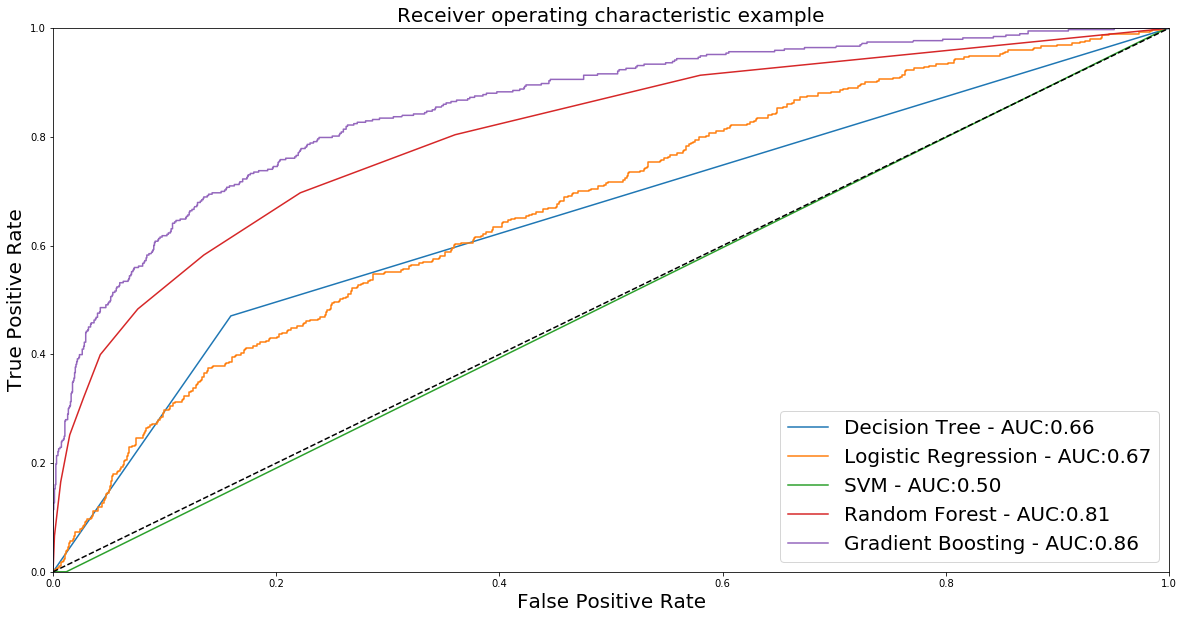

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from matplotlib import pyplot as plt
models = [clf1, clf2, clf3, clf4, clf5]
labels = ['Decision Tree', 'Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boosting']


plt.figure(figsize= [20,10])
for title, clf in zip(labels, models):
    probas_ = clf.predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_Y, probas_[:, 1])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## 超參數調整 (HyperParameter Tuning)

In [48]:
train_X.shape

(8000, 9)

In [50]:
param_dist = {
    'n_estimators' :[50,100,150, 200],
    'max_depth' :[3,5,7]
}

In [52]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
rand = RandomizedSearchCV(clf5, param_dist, cv=10, scoring='accuracy', random_state=10)
rand.fit(train_X,train_Y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 5, 7]},
          pre_dispatch='2*n_jobs', random_state=10, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [53]:
rand.best_params_

{'n_estimators': 50, 'max_depth': 3}

In [55]:
rand.best_score_

0.857125

## 利用最佳參數建立模型

In [56]:
from sklearn.metrics import accuracy_score
clf = GradientBoostingClassifier(n_estimators=50, max_depth=3 )
clf.fit(train_X,train_Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [58]:
predicted = clf.predict(test_X)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_Y, predicted)

0.8615

In [60]:
confusion_matrix(test_Y, predicted)

array([[1560,   47],
       [ 230,  163]], dtype=int64)

In [62]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, predicted))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.78      0.41      0.54       393

   micro avg       0.86      0.86      0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [63]:
probas_ = clf.predict_proba(test_X)
fpr, tpr, thresholds = roc_curve(test_Y, probas_[:, 1])
auc_score = auc(fpr, tpr)
auc_score

0.8565674031075876

## 階層式分群方法

In [64]:
from sklearn.datasets import load_iris
iris = load_iris()

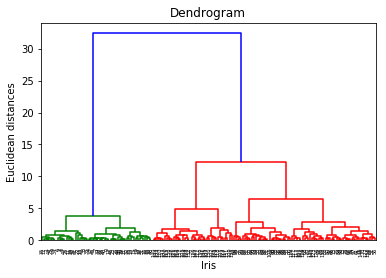

In [65]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendrogram = sch.dendrogram(sch.linkage(iris.data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Iris')
plt.ylabel('Euclidean distances')
plt.show()


In [66]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(
    n_clusters = 3, 
    affinity = 'euclidean',
    linkage = 'ward')

y_hc = hc.fit_predict(iris.data)


In [67]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

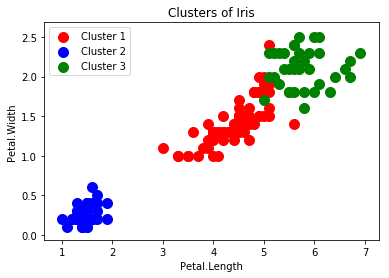

In [68]:
plt.scatter(iris.data[y_hc == 0, 2], iris.data[y_hc == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris.data[y_hc == 1, 2], iris.data[y_hc == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris.data[y_hc == 2, 2], iris.data[y_hc == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Original')

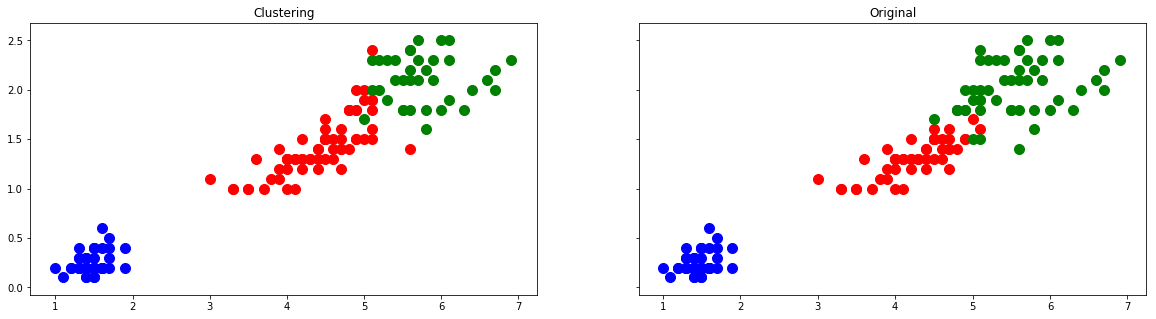

In [72]:
f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20, 5))


axarr[0].scatter(iris.data[y_hc == 0, 2], iris.data[y_hc == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
axarr[0].scatter(iris.data[y_hc == 1, 2], iris.data[y_hc == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
axarr[0].scatter(iris.data[y_hc == 2, 2], iris.data[y_hc == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
axarr[0].set_title('Clustering')

axarr[1].scatter(iris.data[iris.target == 0, 2], iris.data[iris.target == 0, 3], s = 100, c = 'blue', label = 'Cluster 1')
axarr[1].scatter(iris.data[iris.target == 1, 2], iris.data[iris.target == 1, 3], s = 100, c = 'red', label = 'Cluster 2')
axarr[1].scatter(iris.data[iris.target == 2, 2], iris.data[iris.target == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
axarr[1].set_title('Original')

## KMeans 分群

In [73]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state= 123)
y_kmeans = kmeans.fit_predict(iris.data)
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

Text(0.5, 1.0, 'Original')

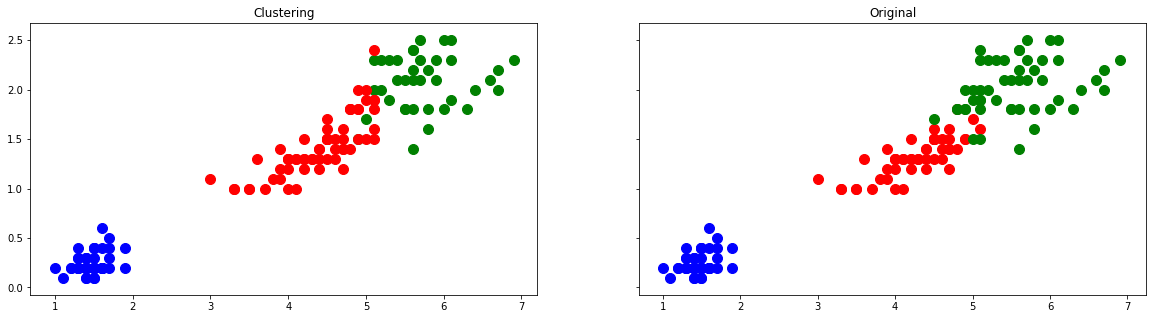

In [76]:
f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20, 5))


axarr[0].scatter(iris.data[y_kmeans == 0, 2], iris.data[y_kmeans == 0, 3], s = 100, c = 'green', label = 'Cluster 1')
axarr[0].scatter(iris.data[y_kmeans == 1, 2], iris.data[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
axarr[0].scatter(iris.data[y_kmeans == 2, 2], iris.data[y_kmeans == 2, 3], s = 100, c = 'red', label = 'Cluster 3')
axarr[0].set_title('Clustering')

axarr[1].scatter(iris.data[iris.target == 0, 2], iris.data[iris.target == 0, 3], s = 100, c = 'blue', label = 'Cluster 1')
axarr[1].scatter(iris.data[iris.target == 1, 2], iris.data[iris.target == 1, 3], s = 100, c = 'red', label = 'Cluster 2')
axarr[1].scatter(iris.data[iris.target == 2, 2], iris.data[iris.target == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
axarr[1].set_title('Original')

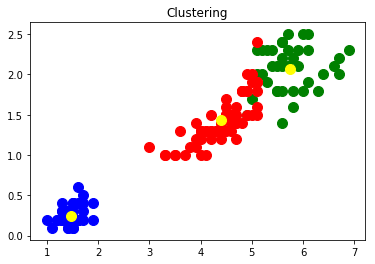

In [81]:
plt.scatter(iris.data[y_kmeans == 0, 2], iris.data[y_kmeans == 0, 3], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(iris.data[y_kmeans == 1, 2], iris.data[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris.data[y_kmeans == 2, 2], iris.data[y_kmeans == 2, 3], s = 100, c = 'red', label = 'Cluster 3')
plt.title('Clustering')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
            s = 100, c = 'yellow', label = 'Centroids')

## 客戶資料分群

In [83]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customers.csv')
X = df.iloc[:,[3,4]]

In [87]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state= 123)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

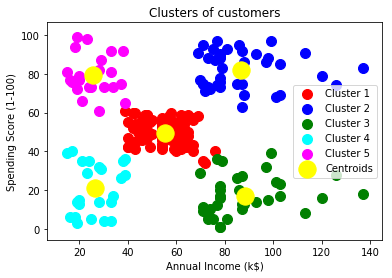

In [98]:
plt.scatter(X[y_kmeans == 0].iloc[:,0],X[y_kmeans == 0].iloc[:,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].iloc[:,0],X[y_kmeans == 1].iloc[:,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].iloc[:,0],X[y_kmeans == 2].iloc[:,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3].iloc[:,0],X[y_kmeans == 3].iloc[:,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4].iloc[:,0],X[y_kmeans == 4].iloc[:,1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow',
label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [100]:
df['Genre'] = df['Genre'].replace({'Male': 1, 'Female': 0})

In [102]:
X2 = df.iloc[:,1:]

In [103]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state= 123)
y_kmeans2 = kmeans.fit_predict(X2)
y_kmeans2

array([6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 3, 0, 6, 4,
       6, 0, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4,
       4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       4, 5, 1, 5, 1, 5, 1, 5, 1, 5, 4, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2,
       7, 2])

## 找出最適分群數

In [104]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state= 42)
y_kmeans = kmeans.fit_predict(X)
kmeans.inertia_


44448.45544793371

In [105]:
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state= 42)
    y_kmeans = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)

In [106]:
wcss

[181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.83934915659,
 21850.165282585633]

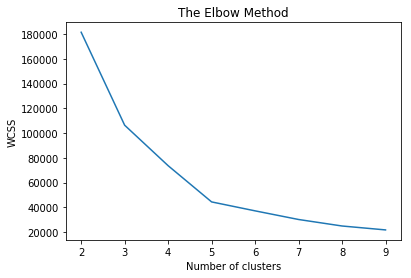

In [107]:
plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [108]:
from sklearn.metrics import silhouette_score
silhouette_score(X,y_kmeans)

0.4565077334305076

In [109]:
sil = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state= 42)
    y_kmeans = kmeans.fit_predict(X)
    sil.append(silhouette_score(X,y_kmeans))

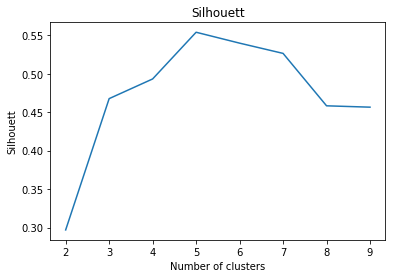

In [110]:
plt.plot(range(2, 10), sil)
plt.title('Silhouett')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouett')
plt.show()

In [116]:
# ward
ward = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_ward = ward.fit_predict(X)

#complete
complete = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_complete = complete.fit_predict(X)

# kmeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

for est, title in zip(
    [y_ward, y_complete , y_kmeans], 
    ['ward', 'complete' , 'kmeans']):
    print(title, silhouette_score(X, est))


ward 0.5529945955148897
complete 0.5529945955148897
kmeans 0.553931997444648


## DBSCAN

In [118]:
from PIL import Image
img = Image.open('C:/Users/user/Desktop/handwriting.png')
img

In [120]:
import numpy as np
im = np.array(img)
im.shape

(28, 28, 3)

In [131]:
from PIL import Image
img = Image.open('C:/Users/user/Desktop/handwriting.png').rotate(-90).convert('L')
img

In [132]:
import numpy as np
im = np.array(img)
im.shape

(28, 28)

In [133]:
ary = np.where(im< 255)

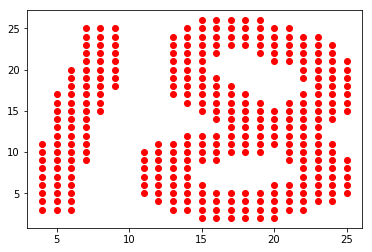

In [134]:
plt.plot()
plt.scatter(ary[0], ary[1], c='red', alpha=1)
plt.show()

In [137]:
X =np.column_stack([ary[0],ary[1]])

In [139]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state= 42)
y_kmeans = kmeans.fit_predict(X)


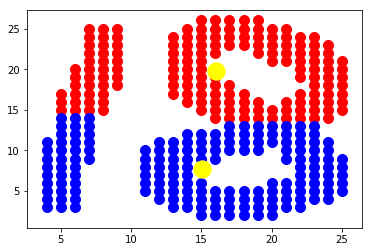

In [142]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c ='red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c ='blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s = 300, c = 'yellow', label = 'Centroids')
plt.show()

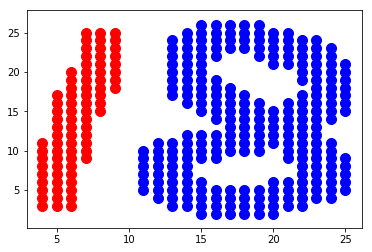

In [144]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=1, min_samples=3)
y_dbs = dbs.fit_predict(X)

plt.scatter(X[y_dbs == 0, 0], X[y_dbs == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_dbs == 1, 0], X[y_dbs == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.show()


## 登革熱資料分析

In [145]:
import pandas
df = pandas.read_csv('https://od.cdc.gov.tw/eic/Dengue_Daily_last12m.csv')

In [149]:
df['發病日'] = pandas.to_datetime(df['發病日'], format = '%Y/%m/%d')

In [151]:
df['month'] = df['發病日'].dt.month
df['year'] = df['發病日'].dt.year

In [155]:
df.groupby(['year','month'])['確定病例數'].sum()

year  month
2018  7         42
      8        124
      9        108
      10        66
      11        49
      12        45
2019  1         35
      2         38
      3         24
      4         31
      5         40
      6         65
      7         23
Name: 確定病例數, dtype: int64

In [203]:
df2 = df[df['year'] == 2019]

In [204]:
df2 = df2[df2['最小統計區中心點X'] != 'None']

In [205]:
df2 = df2[df2['最小統計區中心點Y'] != 'None']

In [206]:
df2['最小統計區中心點X'] = df2['最小統計區中心點X'].astype(float)
df2['最小統計區中心點Y'] = df2['最小統計區中心點Y'].astype(float)

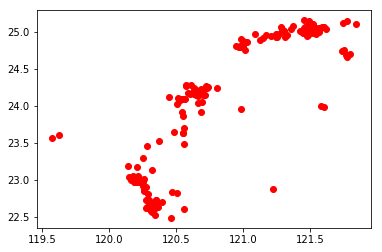

In [207]:
plt.plot()
plt.scatter(df2['最小統計區中心點X'], df2['最小統計區中心點Y'], c='red', alpha=1)
plt.show()

In [208]:
X = df2[['最小統計區中心點X','最小統計區中心點Y']].values

In [209]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.1, min_samples=10)
y_dbs = dbs.fit_predict(X)

In [210]:
import collections, numpy

collections.Counter(y_dbs)

Counter({0: 28, 1: 31, 2: 74, 3: 12, 4: 69, -1: 39})

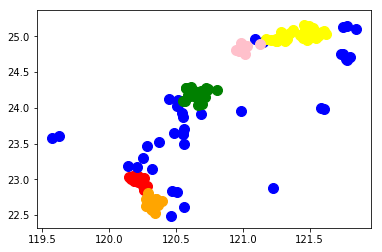

In [213]:
plt.scatter(X[y_dbs == 0, 0], X[y_dbs == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_dbs == -1, 0], X[y_dbs == -1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_dbs == 1, 0], X[y_dbs == 1, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_dbs == 2, 0], X[y_dbs == 2, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_dbs == 3, 0], X[y_dbs == 3, 1], s = 100, c = 'pink', label = 'Cluster 5')
plt.scatter(X[y_dbs == 4, 0], X[y_dbs == 4, 1], s = 100, c = 'orange', label = 'Cluster 6')
plt.show()

## 降低維度

In [214]:
iris.data.shape

(150, 4)

In [283]:
from sklearn.decomposition import PCA
clf = PCA(n_components=2)
clf.fit(iris.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [284]:
clf.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [285]:
X = clf.transform(iris.data)

In [286]:
X[0:3]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943]])

In [287]:
iris.data[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

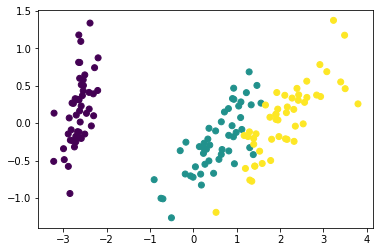

In [288]:
plt.plot()
plt.scatter(X[:,0],X[:,1], c=iris.target)

In [289]:
clf.explained_variance_

array([4.22824171, 0.24267075])

## SVD

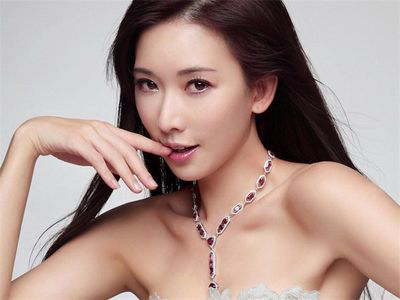

In [230]:
from PIL import Image
img = Image.open('C:/Users/user/Desktop/chiling.jpg')
img

In [232]:
import numpy
imgary = numpy.array(img)
#imgary
imgary = imgary / 255
imgary.shape

(300, 400, 3)

In [233]:
original_bytes = imgary.nbytes

In [234]:
original_bytes

2880000

In [235]:
img_red   = imgary[:, :, 0]
img_green = imgary[:, :, 1]
img_blue  = imgary[:, :, 2]

In [236]:
from numpy.linalg import svd

U_r, S_r, V_r = svd(img_red, full_matrices=True)
U_g, S_g, V_g = svd(img_green, full_matrices=True)
U_b, S_b, V_b = svd(img_blue, full_matrices=True)

In [238]:
U_r.shape, S_r.shape, V_r.shape

((300, 300), (300,), (400, 400))

In [255]:
k = 50

In [256]:
U_r_k = U_r[:, 0:k]
V_r_k = V_r[0:k, :]
U_g_k = U_g[:, 0:k]
V_g_k = V_g[0:k, :]
U_b_k = U_b[:, 0:k]
V_b_k = V_b[0:k, :]

S_r_k = S_r[0:k]
S_g_k = S_g[0:k]
S_b_k = S_b[0:k]

In [257]:
U_r_k.shape, S_r_k.shape, V_r_k.shape

((300, 50), (50,), (50, 400))

In [258]:
compressed_bytes = sum([matrix.nbytes for matrix in 
                        [U_r_k, S_r_k, V_r_k, U_g_k, S_g_k, V_g_k, U_b_k, S_b_k, V_b_k]])
ratio = compressed_bytes / original_bytes
ratio

0.2920833333333333

In [259]:

image_red_approx   = np.dot(U_r_k, np.dot(numpy.diag(S_r_k), V_r_k))
image_green_approx = np.dot(U_g_k, np.dot(numpy.diag(S_g_k), V_g_k))
image_blue_approx  = np.dot(U_b_k, np.dot(numpy.diag(S_b_k), V_b_k))

In [260]:
row, col, _ = imgary.shape
img_reconstructed = np.zeros((row, col, 3))

img_reconstructed[:, :, 0] = image_red_approx
img_reconstructed[:, :, 1] = image_green_approx
img_reconstructed[:, :, 2] = image_blue_approx

In [261]:

img_reconstructed[img_reconstructed < 0] = 0
img_reconstructed[img_reconstructed > 1] = 1

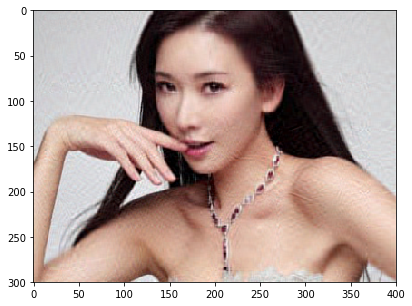

In [262]:
fig = plt.figure(figsize=(10,5))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(img_reconstructed)

## 文字處理

In [263]:
a = 'this is a book'
a.split()

['this', 'is', 'a', 'book']

In [ ]:
a = '酸民婉君也可以報名嗎?'

## 安裝Jieba

In [264]:
! pip install jieba

In [266]:
a = '酸民婉君也可以報名嗎?'
import jieba
jieba.cut(a)

<generator object Tokenizer.cut at 0x0000000025AA95E8>

In [268]:
for w in jieba.cut(a):
    print(w)

酸民婉君
也
可以
報名
嗎
?


In [269]:
list(jieba.cut(a))

['酸民婉君', '也', '可以', '報名', '嗎', '?']

In [270]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://tw.entertainment.appledaily.com/realtime/20190713/1599449/')
soup = BeautifulSoup(res.text, 'lxml')

In [275]:
news = soup.select_one('.ndArticle_margin p').text.split('\xa0')[0]

In [276]:
news

'中國女星范冰冰繼捲入「陰陽合約」陷入事業谷底，上月27日突然宣佈與李晨結束4年情，愛情與事業都歸零的她努力拼復出，但中國央視重播她演出的《建黨偉業》，她鏡頭仍被剪光。雖然電影被剪，但她仍投入工作，昨以創辦人身份在上海公開出席面膜活動。她的復出首作好萊塢電影《355》，日前釋出眾女主合體的花絮影片，偏偏少了她，一度被傳她遭退制出境，但她心情似乎不受此事影響，昨一身綠色褲裝搭配大紅唇妝現身，自家保養品活動，氣色看上去不錯，且身材纖細，臉更瘦成V字，與她之前澄清沒懷孕且變瘦的說法一致。而她被主持人問到感情問題，她則回答：「對製作面膜的熱愛超過談戀愛。」巧妙迴避分手傷心事。（張力文/台北報導） '

In [282]:
import re
re.split('。|，|「|」|《|》|/|（|）', news)

['中國女星范冰冰繼捲入',
 '陰陽合約',
 '陷入事業谷底',
 '上月27日突然宣佈與李晨結束4年情',
 '愛情與事業都歸零的她努力拼復出',
 '但中國央視重播她演出的',
 '建黨偉業',
 '',
 '她鏡頭仍被剪光',
 '雖然電影被剪',
 '但她仍投入工作',
 '昨以創辦人身份在上海公開出席面膜活動',
 '她的復出首作好萊塢電影',
 '355',
 '',
 '日前釋出眾女主合體的花絮影片',
 '偏偏少了她',
 '一度被傳她遭退制出境',
 '但她心情似乎不受此事影響',
 '昨一身綠色褲裝搭配大紅唇妝現身',
 '自家保養品活動',
 '氣色看上去不錯',
 '且身材纖細',
 '臉更瘦成V字',
 '與她之前澄清沒懷孕且變瘦的說法一致',
 '而她被主持人問到感情問題',
 '她則回答：',
 '對製作面膜的熱愛超過談戀愛',
 '',
 '巧妙迴避分手傷心事',
 '',
 '張力文',
 '台北報導',
 ' ']

## Jieba 斷詞

In [290]:
import jieba
seg_list = jieba.cut('大巨蛋案對市府同仁下封口令？ 柯P否認')
list(seg_list)

['大', '巨蛋', '案對', '市府', '同仁', '下', '封口令', '？', ' ', '柯', 'P', '否認']

In [291]:
seg_list = jieba.cut('大巨蛋案對市府同仁下封口令？ 柯P否認', cut_all = True)
list(seg_list)

['大',
 '巨蛋',
 '案',
 '對',
 '市府',
 '同仁',
 '下',
 '封口',
 '封口令',
 '口令',
 '',
 '',
 '',
 '柯',
 'P',
 '否',
 '認']

In [292]:
jieba.load_userdict('userdict.txt')

In [293]:
seg_list = jieba.cut('大巨蛋案對市府同仁下封口令？ 柯P否認')
list(seg_list)

['大巨蛋', '案對', '市府', '同仁', '下', '封口令', '？', ' ', '柯P', '否認']

## Jieba 繁中
- https://github.com/ldkrsi/jieba-zh_TW
- 蓋過 C:\ProgramData\Anaconda3\Lib\site-packages\jieba 路徑

In [2]:
import jieba
jieba.load_userdict('userdict.txt')
seg_list = jieba.cut('大巨蛋案對市府同仁下封口令？ 柯P否認')
list(seg_list)

['大巨蛋', '案對', '市府', '同仁', '下', '封口令', '？', ' ', '柯P', '否認']

In [8]:
import jieba.posseg as pseg
jieba.load_userdict('userdict.txt')
words = pseg.cut("大巨蛋案對市府同仁下封口令？ 柯P否認")
for w in words:
    print(w.word, w.flag)

大巨蛋 N
案 ng
對 p
市府 N
同仁 N
下 POST
封口令 n
？ x
  x
柯P N
否認 v


In [9]:
jieba.add_word('柯P',100,'nr')

In [10]:
import jieba.posseg as pseg
jieba.load_userdict('userdict.txt')
words = pseg.cut("大巨蛋案對市府同仁下封口令？ 柯P否認")
for w in words:
    print(w.word, w.flag)

大巨蛋 N
案 ng
對 p
市府 N
同仁 N
下 POST
封口令 n
？ x
  x
柯P nr
否認 v


In [12]:
sentence = "大巨蛋案對市府同仁下封口令？ 柯P否認"
words = jieba.tokenize(sentence)
for tw in words:
    print(tw[0], tw[1], tw[2])

大巨蛋 0 3
案對 3 5
市府 5 7
同仁 7 9
下 9 10
封口令 10 13
？ 13 14
  14 15
柯P 15 17
否認 17 19


## Apple Daily Break JS
- https://gist.github.com/ywchiu/c2363caa0ae9261babeaea49e4a710fa

## 利用爬蟲取得中文字詞

In [15]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://tw.entertainment.appledaily.com/realtime/20190713/1599487/')
soup = BeautifulSoup(res.text, 'lxml')
soup.select_one('meta[name=keywords]').get('content')

'伯樂影業徐若瑄'

In [18]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://tw.news.appledaily.com/politics/realtime/20190713/1599480/')
soup = BeautifulSoup(res.text, 'lxml')
keywords = '\n'.join(soup.select_one('meta[name=keywords]').get('content').split(','))


In [21]:
with open('userdict.txt', 'w', encoding='utf-8') as f:
    f.write('\n')
    f.write(keywords)

## 利用爬蟲抓取維基百科

In [27]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://zh.wikipedia.org/wiki/%E5%9C%8B%E7%AB%8B%E8%87%BA%E7%81%A3%E5%A4%A7%E5%AD%B8')
soup = BeautifulSoup(res.text, 'lxml')
p = soup.select_one('.mw-parser-output p')

In [30]:
[b.text for b in p.select('b')]

['國立臺灣大學', '臺大', 'NTU']

## N-GRAM

In [31]:
s = '范冰冰情變16天瘦成V字臉'

#bi-gram
for i in range(0, len(s) - 2+ 1):
    print(s[i:i+2])

范冰
冰冰
冰情
情變
變1
16
6天
天瘦
瘦成
成V
V字
字臉


In [32]:
#tri-gram
for i in range(0, len(s) - 3+ 1):
    print(s[i:i+3])

范冰冰
冰冰情
冰情變
情變1
變16
16天
6天瘦
天瘦成
瘦成V
成V字
V字臉


In [35]:
article = '''
美國聯邦貿易委員會在調查社群媒體龍頭「臉書」（Facebook）侵犯用戶隱私的行為後，周五（12日）表決通過重罰臉書約50億美元（約1550億元台幣），成為科技公司遭罰款最多的案例。
 
《華爾街日報》及《華盛頓郵報》引述不具名的消息人士報導，聯邦貿易委員會（Federal Trade Commission，FTC）委員以3:2的表決結果通過重罰臉書，贊成者均為共和黨人，反對者均為民主黨人。預料司法部最終也將同意此一罰款。
 
FTC早在2012年就曾調查臉書有侵犯用戶隱私的疑慮，當時臉書曾與FTC達成協議裁決，承諾更妥善地保護用戶隱私。2018年初，媒體揭發政治顧問公司「劍橋分析」（Cambridge Analytica）不當取得逾5000萬名臉書用戶的私密資訊後，FTC再度展開調查，重點放在臉書是否違反當年的裁決。
 
這回FTC通過裁罰臉書50億美元，是FTC歷來針對科技公司課徵的最大一筆罰款，也是針對侵犯隱私開罰的最鉅額款項。臉書今年4月與FTC協商接近尾聲時，曾透露預料將被罰30億至50億美元。
 
根據臉書這回與FTC達成的協議，臉書將重新檢視其處置用戶資料的方式，但針對該公司將用戶資料與第三方分享的方式，協議將不會做出限制。
 
批評人士認為，協議中要求臉書做的改變不夠多，即使罰款50億美元，對臉書來說也只是九牛一毛。該公司2019年第一季的營收就超過150億美元（約1.55兆台幣）。
 
專門報導企業壟斷行為的「開放巿場研究所」（Open Markets Institute）研究員史托勒（Matt Stoller）痛批FTC裁罰50億美元形同偏袒臉書，等於只是開一張違規停車罰單就放臉書一馬，讓臉書得以從事違法程度更高、侵入性也更高的監控活動。
 
投資人似乎也這麼認為，因為FTC裁罰的消息傳出後，臉書周五股價立刻上漲逾1%。
 
史托勒表示，美國國會應刪減FTC的預算，「把錢挪給願意執法的州執法人員，如拉辛（Karl Racine）」。拉辛是華盛頓特區的檢察長，正尋求就「劍橋分析」一案控告臉書。
 
民主黨聯邦眾議員西西里尼（David Cicilline）也在推特痛批：「FTC提前5個月送了臉書聖誕節禮物。這樣一間擁有巨大影響力的公司，發生如此嚴重的不當行為，卻只是被打了一下手腕，實在令人非常失望。」
 
民主黨聯邦參議員懷登（Ron Wyden）也批評，以臉書這間公司的規模，如此裁罰「只是像蚊子叮了一下」，他擔心「這會讓臉書在最近濫用美國人個資的行為中也脫身」，「唯一能確保美國人隱私受到保護的方式，是通過強有力的隱私法案」。　（國際中心／綜合外電報導）
'''

In [36]:
def ngram(s, n= 2):
    ary = []
    for i in range(0, len(s) - n+ 1):
        ary.append(s[i:i+n])
    return ary

In [39]:
from collections import Counter
w = ngram(article, 2)
c = Counter(w)
c.most_common(20)

[('臉書', 21),
 ('FT', 12),
 ('TC', 12),
 ('\n ', 10),
 (' \n', 10),
 ('。\n', 9),
 ('50', 8),
 ('0億', 8),
 ('公司', 7),
 ('用戶', 6),
 ('隱私', 6),
 ('億美', 6),
 ('美元', 6),
 ('美國', 4),
 ('聯邦', 4),
 ('行為', 4),
 ('通過', 4),
 ('罰款', 4),
 ('協議', 4),
 ('裁罰', 4)]

In [40]:
from collections import Counter
w = ngram(article, 3)
c = Counter(w)
c.most_common(10)

[('FTC', 12),
 ('\n \n', 10),
 ('。\n ', 9),
 ('50億', 7),
 ('0億美', 6),
 ('億美元', 6),
 ('用戶隱', 3),
 ('戶隱私', 3),
 ('罰臉書', 3),
 ('民主黨', 3)]

In [41]:
from collections import Counter
w = ngram(article, 4)
c = Counter(w)
c.most_common(10)

[('。\n \n', 9),
 ('50億美', 6),
 ('0億美元', 6),
 ('用戶隱私', 3),
 ('與FTC', 3),
 ('的方式，', 3),
 ('聯邦貿易', 2),
 ('邦貿易委', 2),
 ('貿易委員', 2),
 ('易委員會', 2)]

## 長詞優先法

```
辭典 = []

for n in range(4,2):
    移除辭典中的字詞
    找出 n-gram 字詞
    如果 n-gram 字詞 > 閥值:
        將 n-gram 字詞 加入詞典
```

In [53]:
import re
keywords = []

for n in range(4,1,-1):
    s = article
    for keyword in keywords:
        s = s.replace(keyword, '')
    words =  ngram(s, n)
    c = Counter(words)
    for k,v in c.most_common():
        if v > 3 and re.match('^[\u4e00-\u9fa5]+$',k):
            keywords.append(k)
keywords

['億美元', '臉書', '公司', '用戶', '隱私', '美國', '聯邦', '行為', '通過', '罰款', '協議', '裁罰', '只是']

In [55]:
with open('userdict.txt', 'a', encoding='utf-8') as f:
    f.write('\n')
    f.write('\n'.join(keywords))

## 文字量化分析

In [60]:
from collections import Counter
jieba.load_userdict('userdict.txt')
c = Counter(list(jieba.cut(article)))
for k, v in c.most_common(30):
    if len(k) >=2:
        print(k,v)

臉書 21
FTC 12
公司 7
用戶 6
隱私 6
美元 6
50 5
美國 4
聯邦 4
行為 4
通過 4
罰款 4


## WordCloud
- https://wordcloud.timdream.org/

## TFIDF

In [61]:
a, abb, abc = ["a"], ["a", "b", "b"], ["a", "b", "c"]
D = [a, abb, abc]

In [63]:
import math

In [64]:
#tfidf('a', a, D)
tf  = 1/1
idf = math.log(3/3)
tf * idf

0.0

In [65]:
#tfidf('a', abb, D)
tf  = 1/3
idf = math.log(3/3)
tf * idf

0.0

In [66]:
#tfidf('a', abc, D)
tf = 1/3
idf = math.log(3/3)
tf * idf

0.0

In [67]:
#tfidf('b', abb, D)
tf  = 2/3
idf = math.log(3/2)
tf * idf

0.27031007207210955

In [68]:
#tfidf('b', abc, D)
tf  = 1/3
idf = math.log(3/2)
tf * idf

0.13515503603605478

In [69]:
#tfidf('c', abc, D)
tf  = 1/3
idf = math.log(3/1)
tf * idf

0.3662040962227032

In [70]:
a = [1,2,2,3,3,2,1]
a.count(2)

3

In [73]:
t = 'b'
ary = []
for doc in D:
    if t in doc:
        ary.append(doc)
len(ary)

2

In [74]:
def tfidf(t,d,D):
    tf   = d.count(t) / len(d)
    idf  = math.log(len(D) / len([doc for doc in D if t in doc]))
    return tf * idf

In [80]:
print(tfidf('a', a, D))
print(tfidf('a', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abb, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

0.0
0.0
0.0
0.27031007207210955
0.13515503603605478
0.3662040962227032


## Jieba 關鍵字
- C:\ProgramData\Anaconda3\Lib\site-packages\jieba\analyse\idf.txt

In [81]:
import jieba
import jieba.analyse
tags = jieba.analyse.extract_tags(article, topK=10)
tags

['臉書', 'FTC', '用戶', '隱私', '50', '美國', '聯邦', '行為', '通過', '罰款']

In [82]:
for x, w in jieba.analyse.textrank(article, withWeight=True):
    print('%s %s' % (x, w))

調查 1.0
重罰 0.8909294154510334
黨人 0.8336179860104221
擁有 0.8296880922070874
華盛頓 0.8284496948437959
刪減 0.8257581984037523
檢察 0.8200514112897687
委員會 0.7667367834444613
報導 0.7634174888580505
媒體 0.7203498787422551
裁決 0.6861642785891231
表決 0.6505593758689706
貿易 0.6151909580779411
重點 0.5800206204811291
資料 0.5635874859535153
違規 0.5635874859535153
綜合 0.5635874859535153
成為 0.5634258791602949
額款 0.5634258791602949
尾聲 0.5634258791602949
